Data Set: https://www.kaggle.com/competitions/titanic

# Import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Data

In [7]:
# Load train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Basic Statistics

In [8]:
# Check the first few rows of the train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Check the first few rows of the test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# Check the shape of the dataset
print(f'Train dataset shape: {train_data.shape}')
print(f'Test dataset shape: {test_data.shape}')


Train dataset shape: (891, 12)
Test dataset shape: (418, 11)


In [11]:
# Check for missing values and data types
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
# Check for basic statistics
print(train_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# Data Cleaning

In [13]:
# Fill missing 'Age' with median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the mode (most frequent value)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Handle missing 'Fare' in test set (if any)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Check again for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


C:\Users\11097\AppData\Local\Temp\ipykernel_6524\4291144251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\11097\AppData\Local\Temp\ipykernel_6524\4291144251.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

# Feature Selection

In [14]:
# Drop 'Name', 'Ticket', 'Cabin' columns (optional)
train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


# Handle Categorical Feature

In [15]:
# Convert 'Sex' to binary: 0 = female, 1 = male
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})

# Convert 'Embarked' to numerical values
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Let's check the transformed data
train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Split

In [16]:
# Select features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Z-score Normalization

In [17]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train

In [19]:
# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=100)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=100)

# Validate

In [20]:
# Predictions on the validation set
y_pred_val = rf_model.predict(X_val_scaled)

# Evaluate the Performance

In [21]:
y_pred_train = rf_model.predict(X_train_scaled)

In [22]:
print(f'Accuracy: {accuracy_score(y_train, y_pred_train):.4f}')

Accuracy: 1.0000


In [23]:
print(f'Accuracy: {accuracy_score(y_val, y_pred_val):.4f}')

Accuracy: 0.8101


In [18]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       1.00      1.00      1.00       268

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [19]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [20]:
print(confusion_matrix(y_train, y_pred_train))

[[444   0]
 [  0 268]]


In [21]:
print(confusion_matrix(y_val, y_pred_val))

[[91 14]
 [20 54]]


# Test

In [25]:
# Prepare the test data
X_test = test_data
X_test_scaled = scaler.transform(X_test)

# Predict on the test dataset
test_predictions = rf_model.predict(X_test_scaled)

# Create a DataFrame for the output
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})

# Save the output to a CSV file for submission
output.to_csv('submission_v3.csv', index=False)

# Visualization

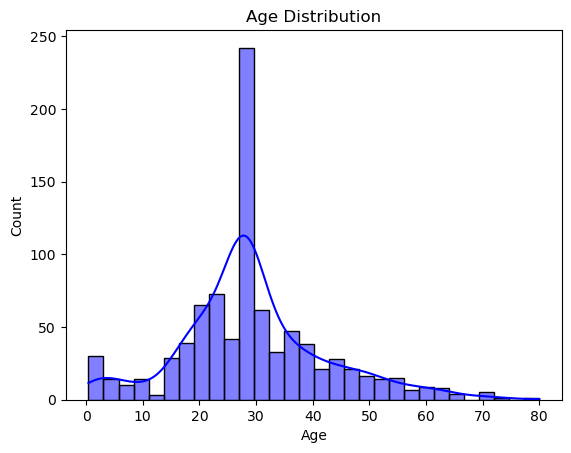

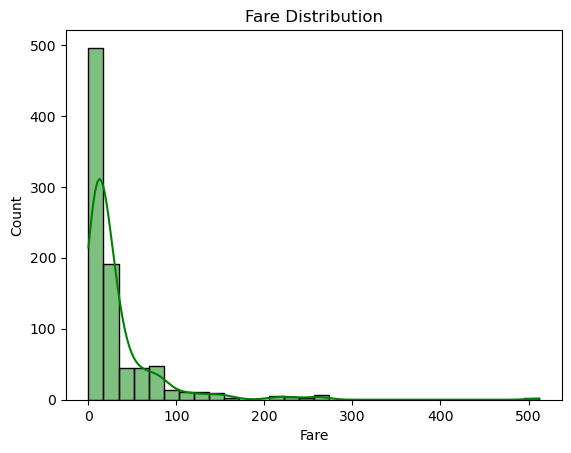

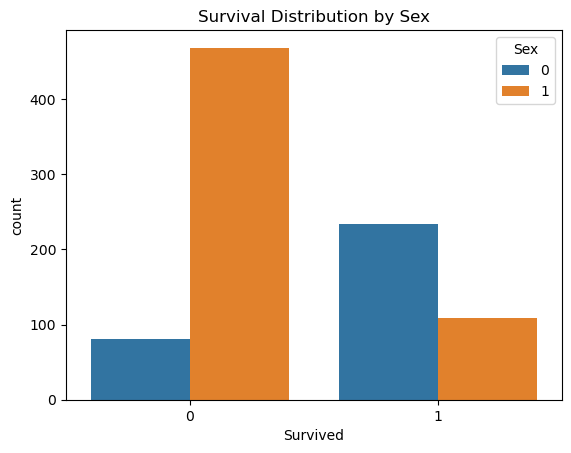

In [26]:
# Visualize the distribution of 'Age' and 'Fare'
sns.histplot(train_data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.show()

sns.histplot(train_data['Fare'], kde=True, bins=30, color='green')
plt.title('Fare Distribution')
plt.show()

# Survival distribution based on 'Sex'
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title('Survival Distribution by Sex')
plt.show()


# Feature Importance

In [27]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display the importance of each feature
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


       Feature  Importance
2          Sex    0.249296
0  PassengerId    0.202464
6         Fare    0.200081
3          Age    0.166694
1       Pclass    0.075617
4        SibSp    0.041445
5        Parch    0.034635
7     Embarked    0.029767


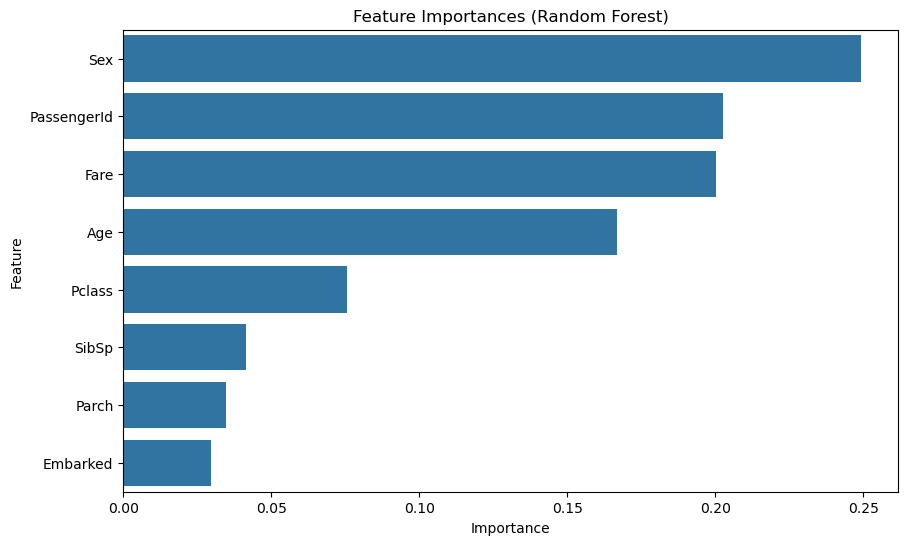

In [25]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Random Forest)')
plt.show()

# Visualize

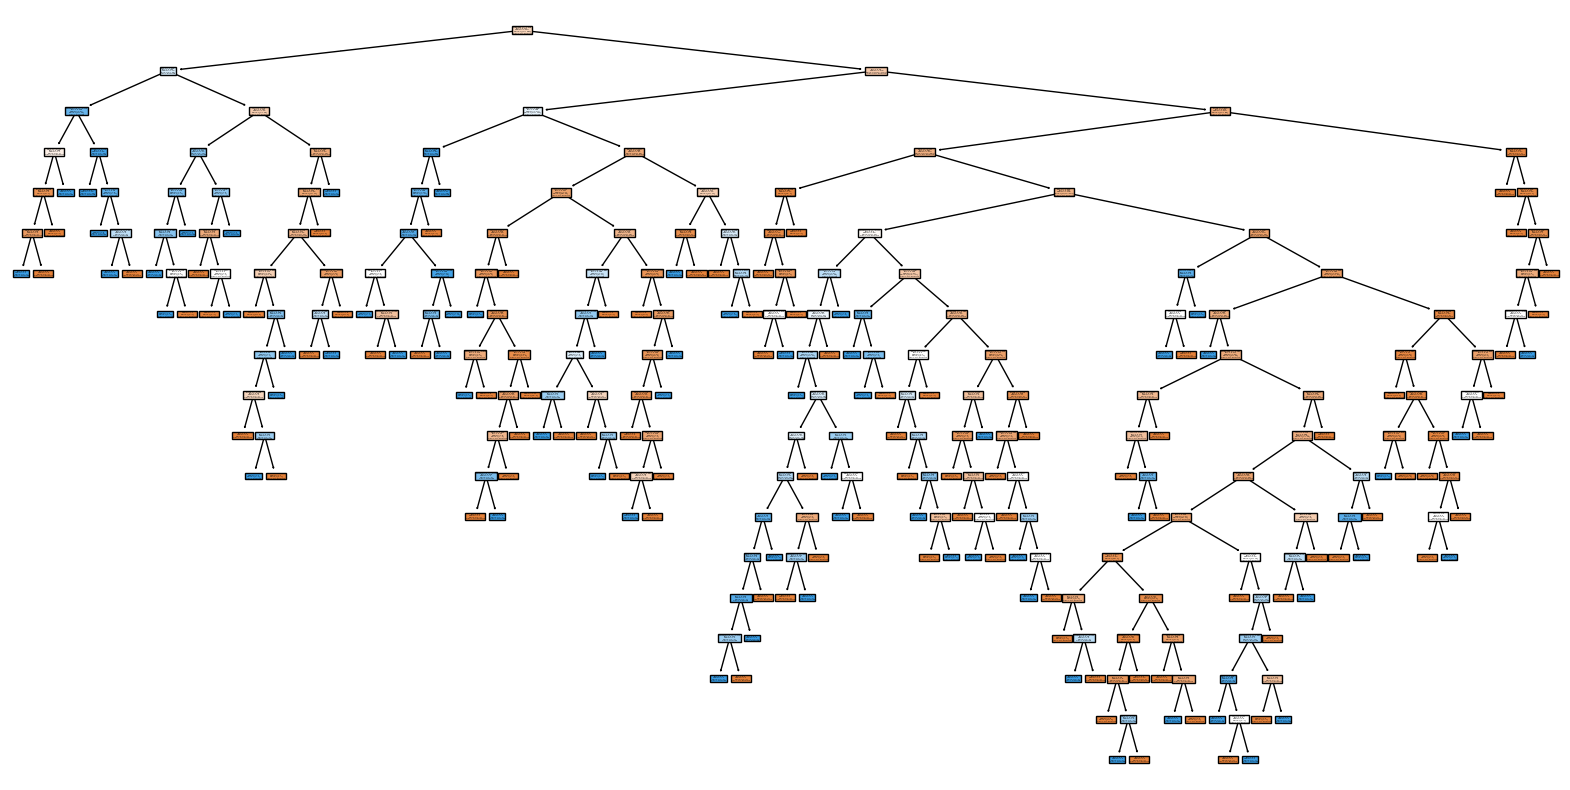

In [26]:
from sklearn.tree import plot_tree

# Visualize the first tree in the random forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.savefig("random_forest_tree.pdf", format='pdf')
plt.show()

# Corr

In [28]:
# Correlation of all features with the target 'Survived'
correlation_matrix = train_data.corr()
print(correlation_matrix['Survived'])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked      -0.167675
Name: Survived, dtype: float64


# My Score

100% Accuracy??????: see reasons [here](https://www.kaggle.com/discussions/general/214175).